## DSAP107

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng as ssl
import statsmodels.stats.outliers_influence as sso
import math

### Summary Statistics

In [2]:
or107 = pd.read_excel('/Users/chihsin1/Documents/stats2_finalProject_data/OR107.xlsx')
print('Head of dataset:')
display(or107.head())

print("Tail of dataset:")
display(or107.tail())

Head of dataset:


,student_id,project,final,total_watch_time,avg_playback_rate,avg_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq
0,88,NaN,NaN,12633.775000,1.161569,0.212223,370,13,54,4,56
1,89,92.69,41.0,38527.933333,1.400646,0.780402,3195,30,1436,36,219
2,90,NaN,NaN,0.000000,0.000000,0.000000,0,0,0,0,0
3,91,NaN,NaN,19812.533333,1.607265,0.460513,7988,449,1134,126,0
4,92,NaN,NaN,0.000000,0.000000,0.000000,0,0,0,0,0


Tail of dataset:


,student_id,project,final,total_watch_time,avg_playback_rate,avg_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq
78,166,94.76,70.0,3979.116667,1.686555,0.097051,455,71,2596,340,241
79,167,NaN,NaN,5726.700000,1.328165,0.109994,82,1,0,0,33
80,168,94.61,75.0,29035.216667,1.499558,0.629655,5896,57,13649,213,532
81,169,98.50,82.0,31742.950000,1.417638,0.650769,1471,15,1519,11,673
82,170,NaN,NaN,0.000000,0.000000,0.000000,0,0,0,0,0


In [7]:
or107.dropna()

,student_id,project,final,total_watch_time,avg_playback_rate,avg_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq
1,89,92.69,41.0,38527.933333,1.400646,0.780402,3195,30,1436,36,219
8,96,92.69,40.0,5517.000000,1.000000,0.079784,111,3,0,0,18
9,97,91.19,72.0,5902.366667,1.367248,0.116705,104,3,157,2,105
10,98,89.78,78.0,14392.633333,1.351594,0.281320,9729,292,13227,1720,1177
12,100,95.00,71.0,16708.100000,1.990651,0.480990,6848,193,2900,125,428
13,101,97.35,66.0,26279.650000,1.730160,0.657537,4719,132,5325,329,628
14,102,90.19,89.0,25164.866667,1.481709,0.539227,1360,29,1308,32,195
15,103,91.19,46.0,17884.883333,1.876948,0.485459,1956,83,1892,121,337
16,104,92.69,88.0,19351.016667,1.891890,0.529436,908,138,578,107,331
17,105,87.94,81.0,33848.733333,1.290211,0.631564,1098,32,3504,45,340


In [9]:
#summary statistics
or107.describe()

,student_id,project,final,total_watch_time,avg_playback_rate,avg_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq
count,83.000000,52.000000,52.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,129.000000,91.274615,71.115385,20126.662952,1.259153,0.421396,4701.650602,146.325301,4730.674699,238.518072,469.927711
std,24.103942,13.410280,16.283823,14869.089090,0.546471,0.312009,8154.017644,276.168608,9081.065089,597.611065,605.587999
min,88.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.500000,90.800000,65.250000,5814.533333,1.183393,0.129517,181.000000,6.000000,146.500000,3.500000,22.000000
50%,129.000000,92.690000,74.500000,21530.800000,1.403376,0.483029,2012.000000,57.000000,1606.000000,57.000000,283.000000
75%,149.500000,95.000000,82.000000,31635.641667,1.505807,0.645881,5243.500000,128.500000,5837.000000,188.000000,650.500000
max,170.000000,98.500000,98.000000,64680.733333,1.990651,1.380743,57753.000000,1766.000000,54689.000000,4697.000000,2657.000000


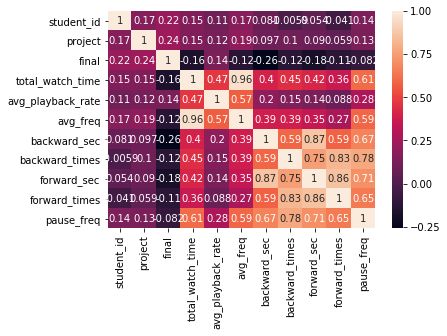

In [10]:
corr = or107.corr()
_ = sns.heatmap(corr, annot=True)

### Scatter Diagram

#### Final

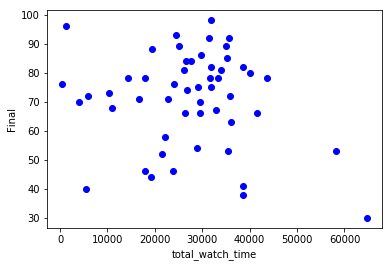

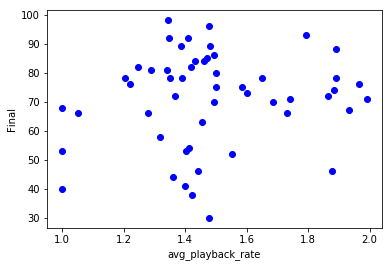

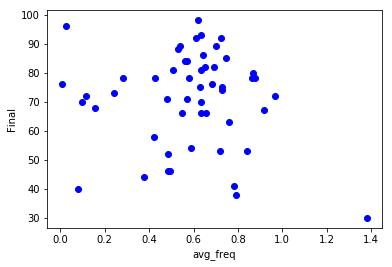

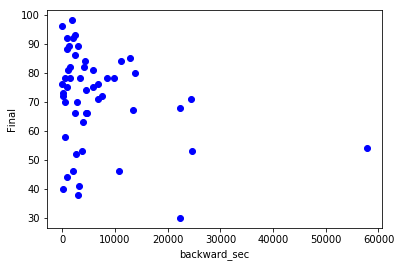

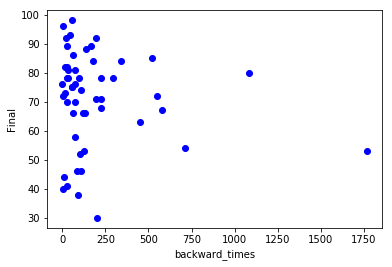

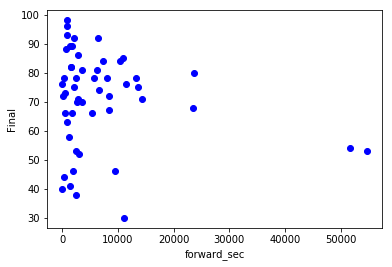

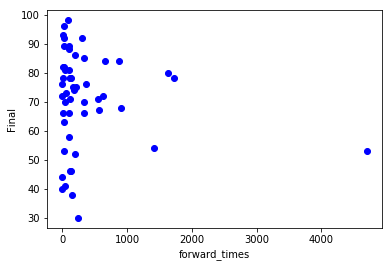

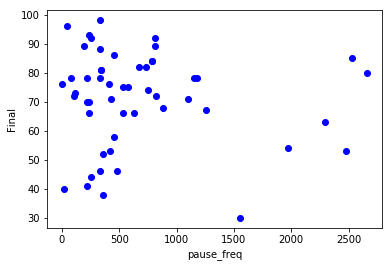

In [11]:
y = or107['final'].values
xnames = ['total_watch_time', 'avg_playback_rate', 'avg_freq', "backward_sec", "backward_times", "forward_sec", "forward_times", "pause_freq"]
for aname in xnames:
    x = or107[aname].values

    _ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Final')
    plt.show()